# Import Necessary Libraries

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Preprocess Data

In [2]:
df = pd.read_csv(r'sling_data_jupyter.csv')
df.head()

,Month,Day,Year,Covid,Day of Week,Holiday,Season,Previous Year Sales,Label
0,9,28,2016,0,Wednesday,1,Fall,0,1
1,9,29,2016,0,Thursday,1,Fall,0,0
2,9,30,2016,0,Friday,1,Fall,0,0
3,10,1,2016,0,Saturday,1,Fall,0,0
4,10,2,2016,0,Sunday,1,Fall,0,0


In [3]:
#Establishing which features will be used as independent variables
weekday = pd.get_dummies(df['Day of Week'])
month = pd.get_dummies(df['Month'])
season = pd.get_dummies(df['Season'])
previous = df['Previous Year Sales']
year = pd.get_dummies(df['Year'])
covid = df['Covid']
labels = df['Label']
#In this version, we are using the day of the wee, the month, the sales on the same day of the previous year, and whether or not it was during covid
features = pd.concat([weekday,month,previous,covid], axis = 1)
features_and_labels = pd.concat([features,df['Label']], axis=1)
features_and_labels

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,...,6,7,8,9,10,11,12,Previous Year Sales,Covid,Label
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,10,0,4
2188,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,10,0,6
2189,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,6,0,16
2190,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,19,0,8


# Train/Test Split

In [13]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=101)
#Alternative split of training on all observations except last year is test set
X_train = features[:1826]
X_test = features[1826:]
y_train = labels[:1826]
y_test = labels[1826:]

# Train Multiple Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
coeff_parameter = pd.DataFrame(model.coef_,features.columns,columns=['Coefficient'])
coeff_parameter
#Here we can visualize which variables were given higher or lower coefficients and whether they are positive or negative

,Coefficient
Friday,-0.655889
Monday,3.698991
Saturday,-1.788427
Sunday,-0.988512
Thursday,-0.479833
Tuesday,0.058817
Wednesday,0.154854
1,1.207656
2,-0.768706
3,-1.009830


In [19]:
predictions = model.predict(X_test)
all_predictions = model.predict(features)
predictions[predictions<0] = 0
all_predictions[all_predictions<0] = 0

# Model Evaluation

In [20]:
mean_squared_error(predictions,y_test)

28.93314683699656

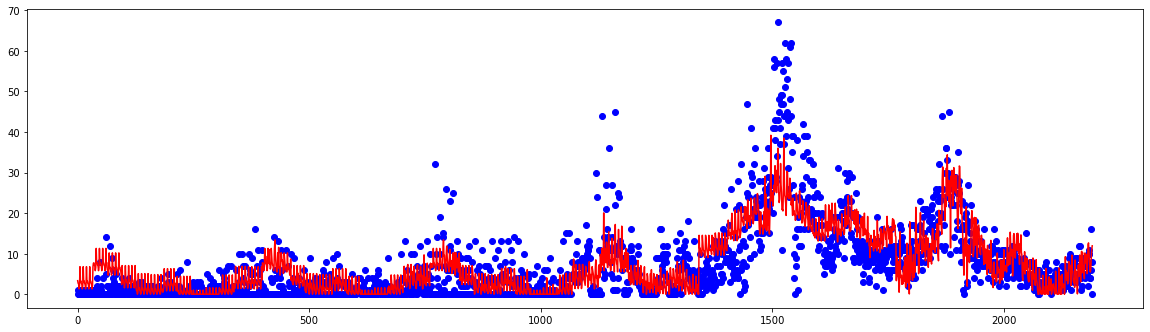

In [21]:
plt.rcParams["figure.figsize"] = (20,5.5)
plt.plot(labels,'o', color = 'blue')
plt.plot(all_predictions, color = 'red')

# Forecast Next Year

In [22]:
next_year_df = pd.read_csv(r'Next Year Predictions Features.csv')
next_year_df.head()

,Month,Day,Year,Day of Week,Holiday,Season,Covid,Previous Year Sales
0,9,29,2022,Thursday,1,Fall,0,15
1,9,30,2022,Friday,1,Fall,0,13
2,10,1,2022,Saturday,1,Fall,0,8
3,10,2,2022,Sunday,1,Fall,0,11
4,10,3,2022,Monday,1,Fall,0,12


In [23]:
new_weekday = pd.get_dummies(next_year_df['Day of Week'])
new_month = pd.get_dummies(next_year_df['Month'])
new_season = pd.get_dummies(next_year_df['Season'])
new_previous = next_year_df['Previous Year Sales']
new_year = pd.get_dummies(next_year_df['Year'])
new_covid = next_year_df['Covid']
#Using the same features for the forecast data obviously
new_features = pd.concat([new_weekday,new_month,new_previous,new_covid], axis = 1)
new_features

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,...,5,6,7,8,9,10,11,12,Previous Year Sales,Covid
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,15,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,13,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,8,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,11,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,4,0
361,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,6,0
362,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,16,0
363,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,8,0


In [24]:
new_predictions = model.predict(new_features)
#To account for negative sales
new_predictions[new_predictions<0] = 0
new_predictions[:10]
#first 10 prediction values

array([ 8.83805869,  7.84329167,  4.57456878,  6.6025504 , 11.69940849,
       11.74343381, 11.83947068, 10.79542836, 10.61937225,  6.21199062])

In [25]:
forecast_plus_all_predictions = np.concatenate((all_predictions,new_predictions), axis = 0)

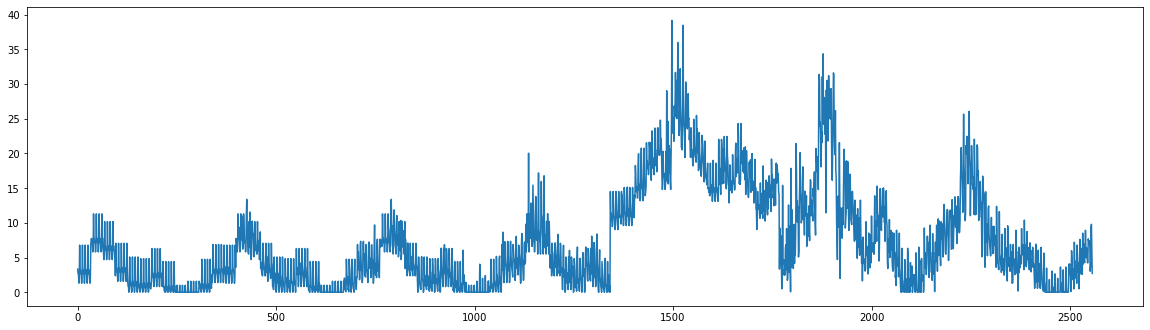

In [26]:

plt.plot(forecast_plus_all_predictions)


In [27]:

#Now that we have our new predictions, we can export them as a csv file to compile them with the rest of our excel data to
#create a few charts
from numpy import asarray
from numpy import savetxt
savetxt('new_predictions.csv', new_predictions, delimiter=',')